# Exploratory Data Analysis

## Week 2 Assignment

In [481]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import Image
from ipywidgets import interact, fixed

## First, we need to read the dataset into our file and explore it a little.
### This dataset was obtained from Kaggle.  Due to the fact that I play soccer, I thought this would be an interesting dataset to look at to find any potential tips on how to become a better player.
#### Here is the link for anyone who also wants this dataset: https://www.kaggle.com/karangadiya/fifa19

In [482]:
soccer_dataset = pd.read_csv("data.csv")
soccer_dataset.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [483]:
soccer_dataset.shape

(18207, 89)

In [484]:
soccer_dataset.dtypes

Unnamed: 0                    int64
ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                      

## Next, we need to check the dataset for duplicates.

In [485]:
soccer_dataset[soccer_dataset.duplicated()].shape

(0, 89)

This shows us that there are no duplicates in this dataset, so we can continue onto the next step.

## Now, we need to clean up this dataset a little bit.
There are quite a few columns, so we can delete some of the unnecessary ones.

In [486]:
del soccer_dataset['Photo']
del soccer_dataset['Flag']
del soccer_dataset['Club Logo']
del soccer_dataset['Body Type']
del soccer_dataset['Real Face']
del soccer_dataset['LS']
del soccer_dataset['ST']
del soccer_dataset['RW']
del soccer_dataset['LW']
del soccer_dataset['RS']
del soccer_dataset['LF']
del soccer_dataset['CM']
del soccer_dataset['RF']
del soccer_dataset['LAM']
del soccer_dataset['CAM']
del soccer_dataset['RAM']
del soccer_dataset['LM']
del soccer_dataset['LCM']
del soccer_dataset['RM']
del soccer_dataset['RCM']
del soccer_dataset['LB']
del soccer_dataset['RWB']
del soccer_dataset['RDM']
del soccer_dataset['CDM']
del soccer_dataset['LDM']
del soccer_dataset['LWB']
del soccer_dataset['CF']
del soccer_dataset['LCB']
del soccer_dataset['CB']
del soccer_dataset['RCB']
del soccer_dataset['RB']
del soccer_dataset['GKDiving']
del soccer_dataset['GKHandling']
del soccer_dataset['GKKicking']
del soccer_dataset['GKPositioning']
del soccer_dataset['GKReflexes']

In [487]:
soccer_dataset.dtypes

Unnamed: 0                    int64
ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     

In [488]:
soccer_dataset.shape

(18207, 53)

Now that we have deleted some of the unnecessary pictures, goalkeeper info, and positioning info our dataset is a little more manageable.

## Next, we must check for missing values in the dataset.

In [489]:
n_records = len(soccer_dataset)
def missing_values_df(df):
    for column in df:
        print("{} | {} | {}".format(
            column, len(df[df[column].isnull()]) / (1.0*n_records), df[column].dtype
        ))
        
missing_values_df(soccer_dataset)

Unnamed: 0 | 0.0 | int64
ID | 0.0 | int64
Name | 0.0 | object
Age | 0.0 | int64
Nationality | 0.0 | object
Overall | 0.0 | int64
Potential | 0.0 | int64
Club | 0.01323666721590597 | object
Value | 0.0 | object
Wage | 0.0 | object
Special | 0.0 | int64
Preferred Foot | 0.0026363486571099027 | object
International Reputation | 0.0026363486571099027 | float64
Weak Foot | 0.0026363486571099027 | float64
Skill Moves | 0.0026363486571099027 | float64
Work Rate | 0.0026363486571099027 | object
Position | 0.0032954358213873785 | object
Jersey Number | 0.0032954358213873785 | float64
Joined | 0.08529686384357664 | object
Loaned From | 0.9305761520294392 | object
Contract Valid Until | 0.015873015873015872 | object
Height | 0.0026363486571099027 | object
Weight | 0.0026363486571099027 | object
Crossing | 0.0026363486571099027 | float64
Finishing | 0.0026363486571099027 | float64
HeadingAccuracy | 0.0026363486571099027 | float64
ShortPassing | 0.0026363486571099027 | float64
Volleys | 0.002636348

Most of these columns are only missing a small percentage of values.  However, 93% of the players are missing information in the "Loaned From" column.  Thus, this column is not providing us much information and can be deleted.

In [490]:
del soccer_dataset['Loaned From']

## Now, we can check for outliers in this dataset.

In [491]:
def outliers_col(df):
    for column in df:
        if df[column].dtype != np.object:
            n_outliers = len(df[(np.abs(stats.zscore(df[column])) > 3)& \
                  (df[column].notnull())
                 ])
            print("{} | {} | {}".format(
                df[column].name,
                n_outliers,
                df[column].dtype
        ))

outliers_col(soccer_dataset)

Unnamed: 0 | 0 | int64
ID | 227 | int64
Age | 22 | int64
Overall | 55 | int64
Potential | 66 | int64
Special | 17 | int64
International Reputation | 0 | float64
Weak Foot | 0 | float64
Skill Moves | 0 | float64
Jersey Number | 0 | float64
Crossing | 0 | float64
Finishing | 0 | float64
HeadingAccuracy | 0 | float64
ShortPassing | 0 | float64
Volleys | 0 | float64
Dribbling | 0 | float64
Curve | 0 | float64
FKAccuracy | 0 | float64
LongPassing | 0 | float64
BallControl | 0 | float64
Acceleration | 0 | float64
SprintSpeed | 0 | float64
Agility | 0 | float64
Reactions | 0 | float64
Balance | 0 | float64
ShotPower | 0 | float64
Jumping | 0 | float64
Stamina | 0 | float64
Strength | 0 | float64
LongShots | 0 | float64
Aggression | 0 | float64
Interceptions | 0 | float64
Positioning | 0 | float64
Vision | 0 | float64
Penalties | 0 | float64
Composure | 0 | float64
Marking | 0 | float64
StandingTackle | 0 | float64
SlidingTackle | 0 | float64


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


This shows us that ID, Age, Overall, Potential, and Special all have outliers.  It is expected that 'ID' would have outliers, as it is just identification numbers, but we should investigate the others.

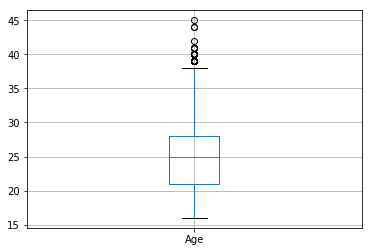

In [492]:
soccer_dataset.boxplot(column='Age');

In [493]:
print(soccer_dataset['Age'].min())
print(soccer_dataset['Age'].max())

16
45


This boxplot shows us there is quite a wide age range in the FIFA players.  The mean is around 25, but there are some outliers around 40 and above.  The youngest player is 16, and the oldest is 45.  These numbers are respectively younger and older than I would expect.

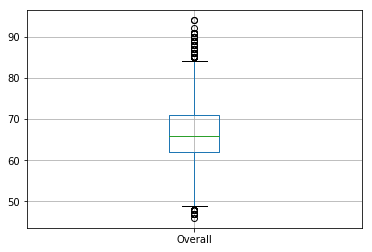

In [494]:
soccer_dataset.boxplot(column='Overall');

This shows us that most players have an overall rating around 65, which is lower than I would expect.  Given that these are all professional soccer players, I feel like I would rate almost all of them higher than that.  The FIFA graders must be a little harsher than me.

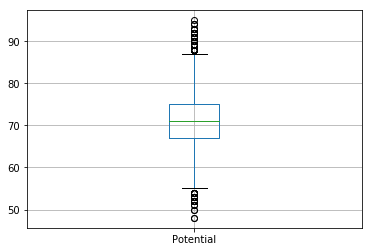

In [495]:
soccer_dataset.boxplot(column='Potential');

This boxplot shows us that most players have a potential rating around 70.  This seems pretty reasonable.  However, this potential rating is also a bit complex and seems a little arbitary.  How do you really give someone a rating on their potential when they are already this far into their soccer career?

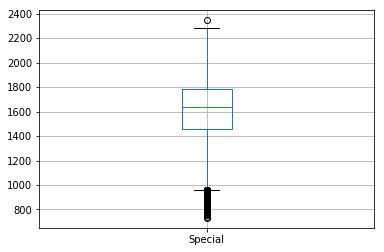

In [496]:
soccer_dataset.boxplot(column='Special');

Special appears to be a confusing column with numbers that do not make sense in any context, so this column can also be deleted from the dataset.

In [497]:
del soccer_dataset['Special']

### With a greater understanding of the dataset as a whole, we can look a little more in depth at the specific columns to find some trends and patterns.

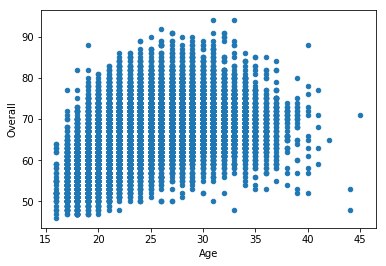

In [498]:
soccer_dataset.plot.scatter(x="Age", y="Overall");

This graph shows us an expected parabolic relationship between age and overall player rating.  This is exactly what we would expect to see.

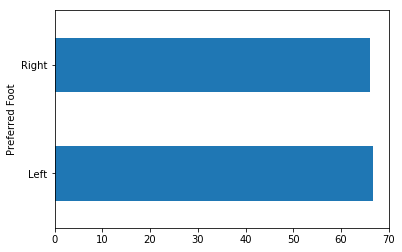

In [499]:
soccer_dataset.groupby("Preferred Foot")["Overall"].mean().plot.barh();

This graph is not very interesting, but it shows that a player's preferred foot does not affect their overall rating.  I honestly would have expected that right-footed players would have a higher average overall rating.  However, I guess foot preference does not affect overall rating.

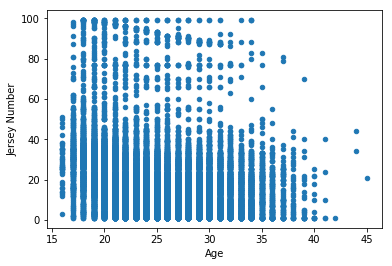

In [500]:
soccer_dataset.plot.scatter(x = 'Age', y = 'Jersey Number')

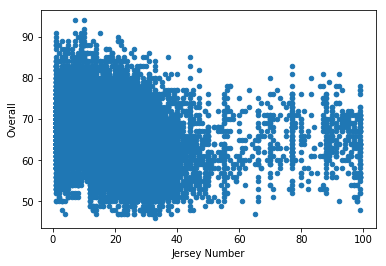

In [501]:
soccer_dataset.plot.scatter(x = 'Jersey Number', y = 'Overall')

Logically, these two graphs show us that jersey number has no effect on age or overall rating.  This is to be expected, but it would be quite interesting if it did have an effect on either of these things.

In [502]:
soccer_dataset[["Name","Wage"]]

,Name,Wage
0,L. Messi,€565K
1,Cristiano Ronaldo,€405K
2,Neymar Jr,€290K
3,De Gea,€260K
4,K. De Bruyne,€355K
5,E. Hazard,€340K
6,L. Modrić,€420K
7,L. Suárez,€455K
8,Sergio Ramos,€380K
9,J. Oblak,€94K


In [503]:
soccer_dataset = soccer_dataset[soccer_dataset['Wage'].str[1:-1]!='']

In [504]:
soccer_dataset['Wage'] = soccer_dataset["Wage"].str[1:-1].astype(int)

In [505]:
soccer_dataset['Wage'] = soccer_dataset["Wage"]*1000

Due to the fact that the players' wages were all entered as €xK, we had to splice each entry to remove the € sign and the K and then convert each entry into an integer.

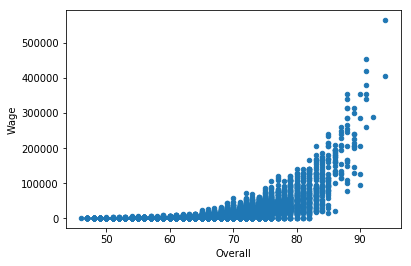

In [506]:
soccer_dataset.plot.scatter(x="Overall", y="Wage");

This scatterplot illustrates what we would expect to find.  As a player's overall rating increases, their wage increases.  However, it is interesting to note that this occurs at an exponential rate, not just a linear rate.  Therefore, once you become ranked as a really, really outstanding player, your salary rockets.

In [507]:
## how are the fifa ratings calculated??? is overall dependent on these things??

## Let's look at some of the data separated by countries

### Let's see what country has players with the most potential to improve (according to the FIFA ratings)

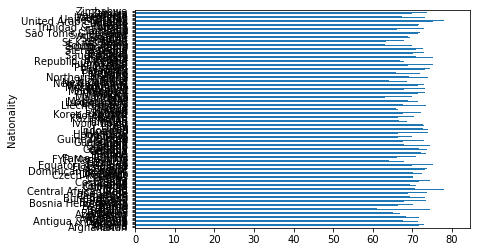

In [508]:
soccer_dataset.groupby("Nationality")['Potential'].mean().plot.barh();

#### Clearly this bar graph is not helpful at all.  There are a few too many countries in this dataset to look at them all.  Thus, let's only look at the top 20 countries in the dataset with the most players in the league.

In [509]:
s1 = soccer_dataset.groupby("Nationality")['Potential'].mean()

In [510]:
s2 = soccer_dataset.groupby('Nationality').size()

In [511]:
potential_dataframe = pd.DataFrame([s1, s2]).T

In [512]:
potential_dataframe = pd.DataFrame(new_dataframe).sort_values(ascending=False, by="Unnamed 0")[:20].reset_index()

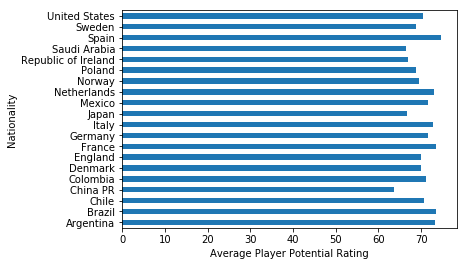

In [513]:
potential_dataframe.groupby("Nationality")['Potential'].mean().plot.barh()
plt.xlabel("Average Player Potential Rating");

This bar graph shows us that Spain is the country with players with the greatest potential on average, and China PR is the country with players with the least potential on average.

In [514]:
overall_dataframe = pd.DataFrame([soccer_dataset.groupby("Nationality")['Overall'].mean(), 
                              soccer_dataset.groupby('Nationality').size()]).T.sort_values(
    ascending=False, by="Unnamed 0")[:20].reset_index()

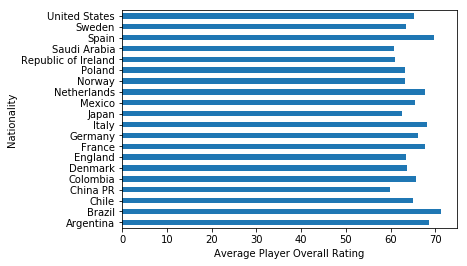

In [515]:
overall_dataframe.groupby("Nationality")['Overall'].mean().plot.barh()
plt.xlabel("Average Player Overall Rating");

This bar graph illustrates that Brazil is the country with the highest overall player ratings on average.  This seems logical, especially due to the fact that Brazil was high on the potential chart too.  The country with the lowest overall player ratings on average is China PR.  This is also expected, as this country has the lowest potential rating on average.

In [516]:
overall_dataframe = pd.DataFrame([soccer_dataset.groupby("Nationality")['Wage'].mean(), 
                              soccer_dataset.groupby('Nationality').size()]).T.sort_values(
    ascending=False, by="Unnamed 0")[:20].reset_index()

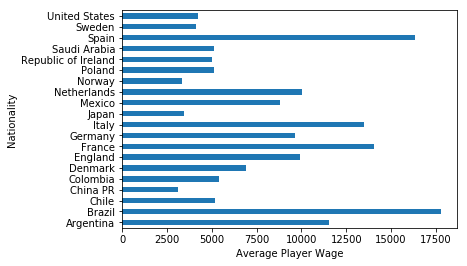

In [517]:
overall_dataframe.groupby("Nationality")['Wage'].mean().plot.barh()
plt.xlabel("Average Player Wage");

This bar graph illustrates that on average players from Spain and Brazil have significantly higher wages than players from any other country in the world.  This is crazy due to the fact that the two graphs above show that these players have almost equally high overall and potential ratings as the players from all the other top countries. These players must play in higher playing leagues or gain larger reputations that would increase their salaries so drastically compared to everyone else.

In [518]:
overall_dataframe = pd.DataFrame([soccer_dataset.groupby("Nationality")['International Reputation'].mean(), 
                              soccer_dataset.groupby('Nationality').size()]).T.sort_values(
    ascending=False, by="Unnamed 0")[:20].reset_index()

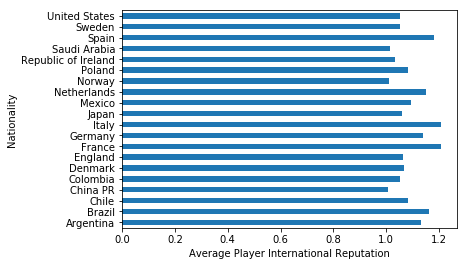

In [519]:
overall_dataframe.groupby("Nationality")['International Reputation'].mean().plot.barh()
plt.xlabel("Average Player International Reputation");

But this bar chart disagrees with one hypothesis from above.  Players from all of these top countries have pretty respectable international ratings.  Brazil (one of the countries with players with the highest wages) does not even have one of the top three highest average player international reputation scores.  Thus, these wage gaps may potentially result from league selection and maybe even a person's background or manager (their ability to market themselves).

## Now let's compare player "Value" and "Wage"
### We would expect these to have a pretty positive, linear relationship.

In [520]:
soccer_dataset = soccer_dataset[soccer_dataset['Value'].str[1:-1]!='']

In [521]:
soccer_dataset['Value'] = soccer_dataset['Value'].str[1:-1].astype(float)

In [522]:
soccer_dataset['Value'] = soccer_dataset['Value']*1000000

We first needed to again convert the value column to integers without the € sign and the M before we could make any comparisons.

In [523]:
soccer_dataset[["Name", "Value", "Wage"]]

,Name,Value,Wage
0,L. Messi,110500000.0,565000
1,Cristiano Ronaldo,77000000.0,405000
2,Neymar Jr,118500000.0,290000
3,De Gea,72000000.0,260000
4,K. De Bruyne,102000000.0,355000
5,E. Hazard,93000000.0,340000
6,L. Modrić,67000000.0,420000
7,L. Suárez,80000000.0,455000
8,Sergio Ramos,51000000.0,380000
9,J. Oblak,68000000.0,94000


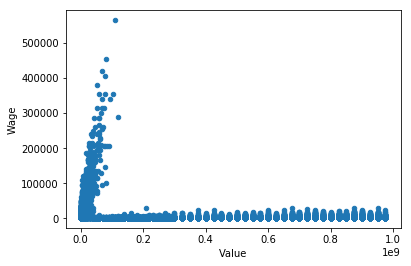

In [524]:
soccer_dataset.plot.scatter(x="Value", y="Wage");

In [525]:
soccer_dataset[["Name", "Value", "Wage", "Overall", "Potential"]].sort_values(ascending=False, by="Value").head(10)

,Name,Value,Wage,Overall,Potential
8420,D. Kolovos,975000000.0,3000,67,71
5150,J. Martins Pereira,975000000.0,5000,70,70
7262,B. Pittón,975000000.0,5000,68,73
5125,M. Casierra,975000000.0,1000,70,70
9265,H. Alpsoy,975000000.0,4000,66,77
6475,J. Joronen,975000000.0,7000,69,73
7366,B. Bese,975000000.0,3000,68,72
7067,Luis Valcarce,975000000.0,4000,68,73
7065,F. Grillo,975000000.0,8000,68,72
9250,B. Innocent,975000000.0,2000,66,77


This scatter plot demonstrates a problem with the dataset.  These players have unreasonably high values given their other attributes (as seen in the smaller data table above).  I think there must be an issue with the FIFA dataset with these players.  There is a small portion of this graph that looks accurate, the portion under the value of €0.2*10^9 shows a clear linear trend, as value increases wage increases as well.  This is what I expected to see from the whole graph.

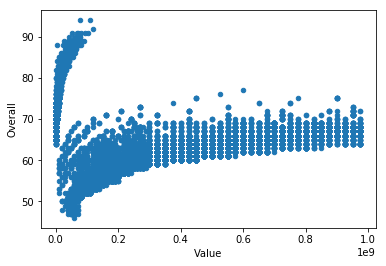

In [526]:
soccer_dataset.plot.scatter(x="Value", y="Overall");

This scatter plot confirms that there must be an issue with the dataset.  There should not be players with such drastically high values and low overall ratings.  Once again, there is a small portion of these results that look as I would expect them.  For some of the values before €0.2*10^9, we can see a logarithmic increase of overall rating as value increases.

Therefore, this column of "Value" is a little useless to us, as it appears to have unreasonable outliers that will skew our graphs.  With this knowledge, we will move onto looking into new aspects of the dataset.

## Lastly, let's investigate the most important skill to have as a player.

In [527]:
def mean_trend(col_calc):
    soccer_dataset.groupby('Overall')[col_calc].mean().plot()
    plt.ylabel(col_calc)
    plt.title("The Relationship between {} and Overall Rating".format(col_calc))
    plt.show()

In [528]:
numerical_variables = soccer_dataset.select_dtypes(include=[np.number]).columns

In [529]:
interact(mean_trend, col_calc=numerical_variables);

interactive(children=(Dropdown(description='col_calc', options=('Unnamed: 0', 'ID', 'Age', 'Overall', 'Potenti…

This interactive graph is interesting.  It allows us to see the many different player attributes in the FIFA dataset compared to overall rating.  Clearly, all of these statistics are important.  All of the player traits are positively correlated with overall rating.  Higher ratings in all of these categories very directly correspond to higher overall ratings.  The only trait that seems to not matter as much in comparison with the overall rating is the "Balance" rating.  Furthermore, while almost all of the other ratings have a linear correlation with overall rating, "International Reputation" has an exponential correlation with overall rating, which is interesting.

In [530]:
def mean_trend(col_calc):
    soccer_dataset.groupby('Wage')[col_calc].mean().plot()
    plt.ylabel(col_calc)
    plt.title("The Relationship between {} and Wage".format(col_calc))
    plt.show()

In [531]:
interact(mean_trend, col_calc=numerical_variables);

interactive(children=(Dropdown(description='col_calc', options=('Unnamed: 0', 'ID', 'Age', 'Overall', 'Potenti…

This interactive graph is also interesting.  Unlike the graph above, not all of the player trait ratings are correlated in a positive, linear manner with wage.  "Weak Foot", "Skill Moves", "Heading Accuracy", "Strength", "Agression", "Interceptions", "Marking", "StandingTackle", and "SlidingTackle" are not correlated in any specific way with a player's wage.  This is interesting to note, as these traits are all correlated with a player's overall rating, which is supposed to be correlated with wage.  However, all of the other player traits are correlated positively with wage, so when these ratings increse, wage increases.  Interestingly, some of these are correlated in a linear manner and some in an exponential manner.

Therefore, the graphs above illustrate that to be an elite player, one needs to have high ratings in every aspect of his/her game.  Every category and skill is important.  Achieving a high overall score only comes with high ratings in every possible skill.

Nonetheless, there is one last thing that must be discussed.  All of this information derives from the FIFA dataset with FIFA ratings in each category.  We can assume these ratings are not just arbitrary numbers, but we must keep in mind that we do not know how these ratings are created.  Thus, we must absorb this information with a slight grain of salt.  As well, many of these graphs are based on the category of "Overall".  There is the possibility that this category was calculated looking at all of the other statistics/ratings in this dataset.  Therefore, it creates a kind of cyclical process of data analysis.  If one variable was based off another, the results will obviously turn out a certain way, and this will not predict anything new or insightful.  This should not negate everything in this file.  However, it should be noted while observing these results. 